In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pnevmoniya/sample_solution.csv
/kaggle/input/pnevmoniya/test/test_img_10340.jpeg
/kaggle/input/pnevmoniya/test/test_img_10168.jpeg
/kaggle/input/pnevmoniya/test/test_img_10613.jpeg
/kaggle/input/pnevmoniya/test/test_img_10368.jpeg
/kaggle/input/pnevmoniya/test/test_img_10036.jpeg
/kaggle/input/pnevmoniya/test/test_img_10527.jpeg
/kaggle/input/pnevmoniya/test/test_img_10020.jpeg
/kaggle/input/pnevmoniya/test/test_img_10585.jpeg
/kaggle/input/pnevmoniya/test/test_img_10276.jpeg
/kaggle/input/pnevmoniya/test/test_img_10054.jpeg
/kaggle/input/pnevmoniya/test/test_img_10298.jpeg
/kaggle/input/pnevmoniya/test/test_img_10355.jpeg
/kaggle/input/pnevmoniya/test/test_img_10511.jpeg
/kaggle/input/pnevmoniya/test/test_img_10410.jpeg
/kaggle/input/pnevmoniya/test/test_img_10096.jpeg
/kaggle/input/pnevmoniya/test/test_img_10219.jpeg
/kaggle/input/pnevmoniya/test/test_img_10057.jpeg
/kaggle/input/pnevmoniya/test/test_img_10296.jpeg
/kaggle/input/pnevmoniya/test/test_img_10407.jpeg
/kagg

In [2]:
from fastai.vision.all import *
from ipywidgets import widgets
import pandas as pd
import numpy as np

In [3]:
import torch
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle 
import cv2 
%matplotlib inline

In [4]:
train = Path("/kaggle/input/pnevmoniya/train")
test = Path("/kaggle/input/pnevmoniya/test")

train.ls()



(#2) [Path('/kaggle/input/pnevmoniya/train/PNEUMONIA'),Path('/kaggle/input/pnevmoniya/train/NORMAL')]

In [5]:
pnev_block= DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)
)

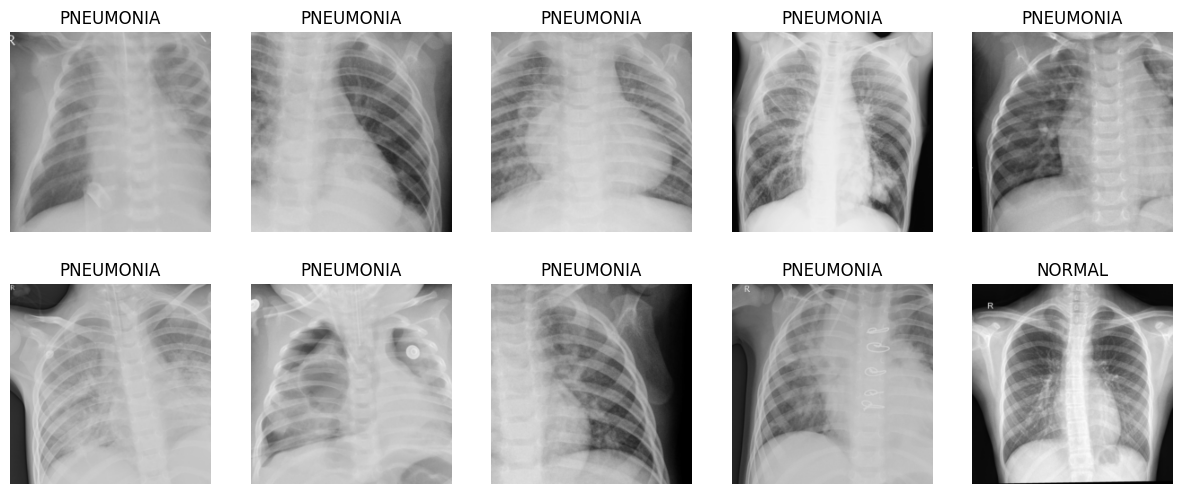

In [6]:
dls=pnev_block.dataloaders(train)
dls.train.show_batch(max_n=10, nrows=2)

In [7]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(7)

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 136MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.483384,0.219741,0.925216,00:59


epoch,train_loss,valid_loss,accuracy,time
0,0.155020,0.097589,0.968360,00:59
1,0.106173,0.085704,0.972196,01:00
2,0.064097,0.059926,0.984660,00:59
3,0.042982,0.063371,0.978907,01:00
4,0.026231,0.055288,0.981783,01:01
5,0.015585,0.034357,0.986577,00:59
6,0.007799,0.027570,0.989453,00:58


In [8]:
interp=ClassificationInterpretation.from_learner(learn)

In [9]:
interp.print_classification_report()

              precision    recall  f1-score   support

      NORMAL       0.99      0.97      0.98       275
   PNEUMONIA       0.99      0.99      0.99       768

    accuracy                           0.99      1043
   macro avg       0.99      0.98      0.99      1043
weighted avg       0.99      0.99      0.99      1043



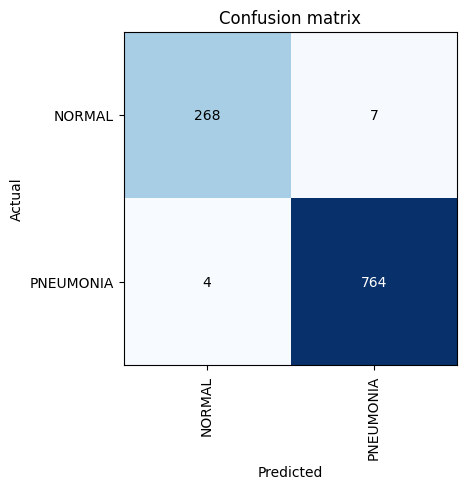

In [10]:
interp.plot_confusion_matrix()

In [11]:
df=pd.read_csv('/kaggle/input/pnevmoniya/sample_solution.csv')
df.tail()

,id,labels
619,test_img_10620.jpeg,0
620,test_img_10621.jpeg,0
621,test_img_10622.jpeg,0
622,test_img_10623.jpeg,0
623,test_img_10624.jpeg,0


In [12]:
for i in range(0,624):
    label=df.iloc[i,0]
    img=PILImage.create(Path(f'/kaggle/input/pnevmoniya/test/{label}'))
    pred, _, prob=learn.predict(img)
    df.iloc[i,1]=pred

/tmp/ipykernel_24/1049790958.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'PNEUMONIA' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[i,1]=pred


In [13]:
df['labels']=df['labels'].replace({'PNEUMONIA':1,'NORMAL':0})
df.to_csv('submission_csv',index=False)

/tmp/ipykernel_24/1232584278.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['labels']=df['labels'].replace({'PNEUMONIA':1,'NORMAL':0})


In [14]:
result = pd.read_csv('submission_csv')
result.head(50)

,id,labels
0,test_img_10001.jpeg,1
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,1
3,test_img_10004.jpeg,1
4,test_img_10005.jpeg,0
5,test_img_10006.jpeg,1
6,test_img_10007.jpeg,0
7,test_img_10008.jpeg,1
8,test_img_10009.jpeg,1
9,test_img_10010.jpeg,1
